# **SVC MultiEntrada Clasificador - Empresa Buenaventura**
#### **Curso:** Inteligencia de Negocios
#### **Docente:**  Mg. Ernesto D. Cancho Rodríguez
#### **Equipo:** D
#### **Integrantes:**
*   Hurtado Santos, Estiven Salvador - 20200135
*   López Terrones, Ximena Xiomy - 20200020
*   Llactahuaman Muguerza, Anthony Joel - 20200091
*   Mondragón Zúñiga, Rubén Alberto - 20200082
*   Morales Robladillo, Nicole Maria - 20200136
*   Aquije Vásquez, Carlos Adrian - 19200319
*   Cespedes Flores, Sebastian - 1820025

### Importamos Librerías

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [49]:
#Descargamos una librería externa
!pip install yfinance

In [2]:
#Importamos la librería nueva
import yfinance as yf

In [3]:
fechaInicio = '2018-01-01'
fechaFin = '2022-12-31'

### Carga de datos Minera Buenaventura

In [4]:
BVN_df = yf.download('BVN', start = fechaInicio, end = fechaFin)
#Añadimos la terminación _BVN a cada columna
BVN_df.columns += "_BVN"
BVN_df

[*********************100%***********************]  1 of 1 completed


Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN
Date                                                                         
2018-01-02     14.16     14.54    13.99      14.52      14.124079     1643300
2018-01-03     14.53     14.89    14.35      14.62      14.221351     1606700
2018-01-04     14.66     15.12    14.56      15.02      14.610445     1845400
2018-01-05     14.95     15.15    14.81      14.84      14.435352     1037400
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100
...              ...       ...      ...        ...            ...         ...
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200

[1259 rows x 6 columns]

### Inputs para Predicción

#### Mercado de Commodities

##### Datos de GLD (ORO)

In [5]:
GLD_data = yf.download('GLD', start = fechaInicio, end = fechaFin)
GLD_data.columns += "_GLD"
GLD_data

[*********************100%***********************]  1 of 1 completed


Open_GLD    High_GLD     Low_GLD   Close_GLD  Adj Close_GLD  \
Date                                                                        
2018-01-02  124.660004  125.180000  124.389999  125.150002     125.150002   
2018-01-03  125.050003  125.089996  124.099998  124.820000     124.820000   
2018-01-04  124.889999  125.849998  124.739998  125.459999     125.459999   
2018-01-05  124.930000  125.480003  124.830002  125.330002     125.330002   
2018-01-08  125.199997  125.320000  124.900002  125.309998     125.309998   
...                ...         ...         ...         ...            ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995     167.259995   
2022-12-27  167.889999  170.610001  167.800003  168.669998     168.669998   
2022-12-28  168.050003  168.339996  167.100006  167.910004     167.910004   
2022-12-29  168.539993  169.350006  168.520004  168.850006     168.850006   
2022-12-30  169.259995  169.899994  168.800003  169.639999     169.639999   

            Volume_GLD  
Date                    
2018-01-02    11762500  
2018-01-03     7904300  
2018-01-04     7329700  
2018-01-05     5739900  
2018-01-08     3566700  
...                ...  
2022-12-23     2912300  
2022-12-27     6885700  
2022-12-28     3662500  
2022-12-29     3345900  
2022-12-30     2864500  

[1259 rows x 6 columns]

##### Datos de SLV (Plata)

In [6]:
SLV_data = yf.download('SLV', start = fechaInicio, end = fechaFin)
SLV_data.columns += "_SLV"
SLV_data

[*********************100%***********************]  1 of 1 completed


Open_SLV   High_SLV    Low_SLV  Close_SLV  Adj Close_SLV  \
Date                                                                    
2018-01-02  16.129999  16.230000  16.120001  16.209999      16.209999   
2018-01-03  16.190001  16.260000  16.090000  16.170000      16.170000   
2018-01-04  16.209999  16.299999  16.190001  16.230000      16.230000   
2018-01-05  16.180000  16.290001  16.160000  16.219999      16.219999   
2018-01-08  16.170000  16.190001  16.070000  16.150000      16.150000   
...               ...        ...        ...        ...            ...   
2022-12-23  21.780001  21.950001  21.690001  21.850000      21.850000   
2022-12-27  21.959999  22.350000  21.920000  22.110001      22.110001   
2022-12-28  21.930000  21.969999  21.600000  21.600000      21.600000   
2022-12-29  22.059999  22.139999  21.950001  21.969999      21.969999   
2022-12-30  21.920000  22.030001  21.639999  22.020000      22.020000   

            Volume_SLV  
Date                    
2018-01-02     8943200  
2018-01-03     9149500  
2018-01-04     7466300  
2018-01-05     5651500  
2018-01-08     6707000  
...                ...  
2022-12-23    10922300  
2022-12-27    12346900  
2022-12-28    10915100  
2022-12-29    11896400  
2022-12-30    14251000  

[1259 rows x 6 columns]

##### Datos de COPX (Cobre)

In [7]:
COPX_data = yf.download('COPX', start = fechaInicio, end = fechaFin)
COPX_data.columns += "_COPX"
COPX_data

[*********************100%***********************]  1 of 1 completed


Open_COPX  High_COPX   Low_COPX  Close_COPX  Adj Close_COPX  \
Date                                                                      
2018-01-02  27.750000  28.129999  27.580000   28.049999       24.984917   
2018-01-03  28.150000  28.150000  27.620001   27.760000       24.726606   
2018-01-04  28.150000  28.309999  28.059999   28.200001       25.118532   
2018-01-05  28.240000  28.330000  28.100000   28.299999       25.207602   
2018-01-08  28.430000  28.510000  28.299999   28.480000       25.367931   
...               ...        ...        ...         ...             ...   
2022-12-23  35.639999  36.040001  35.290001   36.029999       35.155205   
2022-12-27  36.500000  36.799999  36.330002   36.480000       35.594276   
2022-12-28  36.689999  36.810001  36.009998   36.049999       35.174717   
2022-12-29  36.049999  36.230000  35.790001   36.020000       35.534801   
2022-12-30  35.820000  35.990002  35.400002   35.430000       34.952751   

            Volume_COPX  
Date                     
2018-01-02        91300  
2018-01-03       272600  
2018-01-04        57300  
2018-01-05        72600  
2018-01-08        61900  
...                 ...  
2022-12-23       185000  
2022-12-27       335700  
2022-12-28       605100  
2022-12-29       173900  
2022-12-30       125600  

[1259 rows x 6 columns]

#### Índicies

##### Datos de GSPC (Índice SP500)


In [8]:
GSPC_data = yf.download('^GSPC', start = fechaInicio, end = fechaFin)
GSPC_data.columns += "_GSPC"
GSPC_data

[*********************100%***********************]  1 of 1 completed


Open_GSPC    High_GSPC     Low_GSPC   Close_GSPC  \
Date                                                             
2018-01-02  2683.729980  2695.889893  2682.360107  2695.810059   
2018-01-03  2697.850098  2714.370117  2697.770020  2713.060059   
2018-01-04  2719.310059  2729.290039  2719.070068  2723.989990   
2018-01-05  2731.330078  2743.449951  2727.919922  2743.149902   
2018-01-08  2742.669922  2748.510010  2737.600098  2747.709961   
...                 ...          ...          ...          ...   
2022-12-23  3815.110107  3845.800049  3797.010010  3844.820068   
2022-12-27  3843.340088  3846.649902  3813.219971  3829.250000   
2022-12-28  3829.560059  3848.320068  3780.780029  3783.219971   
2022-12-29  3805.449951  3858.189941  3805.449951  3849.280029   
2022-12-30  3829.060059  3839.850098  3800.340088  3839.500000   

            Adj Close_GSPC  Volume_GSPC  
Date                                     
2018-01-02     2695.810059   3397430000  
2018-01-03     2713.060059   3544030000  
2018-01-04     2723.989990   3697340000  
2018-01-05     2743.149902   3239280000  
2018-01-08     2747.709961   3246160000  
...                    ...          ...  
2022-12-23     3844.820068   2819280000  
2022-12-27     3829.250000   3030300000  
2022-12-28     3783.219971   3083520000  
2022-12-29     3849.280029   3003680000  
2022-12-30     3839.500000   2979870000  

[1259 rows x 6 columns]

##### Datos de IXIC (Índice NASDAQ)

In [9]:
IXIC_data = yf.download('^IXIC', start = fechaInicio, end = fechaFin)
IXIC_data.columns += "_IXIC"
IXIC_data

[*********************100%***********************]  1 of 1 completed


Open_IXIC     High_IXIC      Low_IXIC    Close_IXIC  \
Date                                                                 
2018-01-02   6937.649902   7006.910156   6924.080078   7006.899902   
2018-01-03   7017.069824   7069.149902   7016.700195   7065.529785   
2018-01-04   7089.500000   7098.049805   7072.379883   7077.910156   
2018-01-05   7105.740234   7137.040039   7097.080078   7136.560059   
2018-01-08   7135.379883   7161.350098   7124.089844   7157.390137   
...                  ...           ...           ...           ...   
2022-12-23  10437.750000  10514.759766  10361.820312  10497.860352   
2022-12-27  10462.190430  10472.320312  10340.730469  10353.230469   
2022-12-28  10339.200195  10414.820312  10207.469727  10213.290039   
2022-12-29  10321.459961  10502.080078  10301.059570  10478.089844   
2022-12-30  10368.370117  10468.309570  10324.700195  10466.480469   

            Adj Close_IXIC  Volume_IXIC  
Date                                     
2018-01-02     7006.899902   1929700000  
2018-01-03     7065.529785   2173130000  
2018-01-04     7077.910156   2103220000  
2018-01-05     7136.560059   2024000000  
2018-01-08     7157.390137   2055010000  
...                    ...          ...  
2022-12-23    10497.860352   3544680000  
2022-12-27    10353.230469   3827290000  
2022-12-28    10213.290039   3842970000  
2022-12-29    10478.089844   4154100000  
2022-12-30    10466.480469   3959030000  

[1259 rows x 6 columns]

##### Datos de DJI (Índice Dow Jones)

In [10]:
DJI_data = yf.download('^DJI', start = fechaInicio, end = fechaFin)
DJI_data.columns += "_DJI"
DJI_data

[*********************100%***********************]  1 of 1 completed


Open_DJI      High_DJI       Low_DJI     Close_DJI  \
Date                                                                 
2018-01-02  24809.349609  24864.189453  24741.699219  24824.009766   
2018-01-03  24850.449219  24941.919922  24825.550781  24922.679688   
2018-01-04  24964.859375  25105.960938  24963.269531  25075.130859   
2018-01-05  25114.919922  25299.789062  25112.009766  25295.869141   
2018-01-08  25308.400391  25311.990234  25235.410156  25283.000000   
...                  ...           ...           ...           ...   
2022-12-23  32961.058594  33226.140625  32814.019531  33203.929688   
2022-12-27  33224.230469  33387.718750  33069.578125  33241.558594   
2022-12-28  33264.761719  33379.550781  32869.148438  32875.710938   
2022-12-29  33021.429688  33293.421875  33020.351562  33220.800781   
2022-12-30  33121.609375  33152.550781  32847.820312  33147.250000   

            Adj Close_DJI  Volume_DJI  
Date                                   
2018-01-02   24824.009766   341130000  
2018-01-03   24922.679688   456790000  
2018-01-04   25075.130859   403280000  
2018-01-05   25295.869141   358020000  
2018-01-08   25283.000000   341390000  
...                   ...         ...  
2022-12-23   33203.929688   221050000  
2022-12-27   33241.558594   246010000  
2022-12-28   32875.710938   252260000  
2022-12-29   33220.800781   243060000  
2022-12-30   33147.250000   295500000  

[1259 rows x 6 columns]

#### Mercado de divisas y Criptomonedas

##### Datos de PEN

In [11]:
PEN_X_data = yf.download('PEN=X', start = fechaInicio, end = fechaFin)
PEN_X_data.columns += "_PEN_X"
PEN_X_data

[*********************100%***********************]  1 of 1 completed


Open_PEN_X  High_PEN_X  Low_PEN_X  Close_PEN_X  Adj Close_PEN_X  \
Date                                                                          
2018-01-01      3.1677    3.237500   3.167700       3.1677           3.1677   
2018-01-02      3.1645    3.237700   3.164500       3.1650           3.1650   
2018-01-03      3.1712    3.231300   3.171200       3.1719           3.1719   
2018-01-04      3.1667    3.217500   3.166700       3.1655           3.1655   
2018-01-05      3.1480    3.211800   3.148000       3.1503           3.1503   
...                ...         ...        ...          ...              ...   
2022-12-26      3.8000    3.817500   3.729490       3.8000           3.8000   
2022-12-27      3.8175    3.744818   3.717184       3.8175           3.8175   
2022-12-28      3.8080    3.748091   3.740191       3.8080           3.8080   
2022-12-29      3.8080    3.808000   3.737398       3.8080           3.8080   
2022-12-30      3.7850    3.729650   3.712905       3.7850           3.7850   

            Volume_PEN_X  
Date                      
2018-01-01             0  
2018-01-02             0  
2018-01-03             0  
2018-01-04             0  
2018-01-05             0  
...                  ...  
2022-12-26             0  
2022-12-27             0  
2022-12-28             0  
2022-12-29             0  
2022-12-30             0  

[1304 rows x 6 columns]

##### Datos ETH

##### Datos BZ

In [12]:
BZ_F_data = yf.download('BZ=F', start = fechaInicio, end = fechaFin)
BZ_F_data.columns += "_BZ_F"
BZ_F_data

[*********************100%***********************]  1 of 1 completed


Open_BZ_F  High_BZ_F   Low_BZ_F  Close_BZ_F  Adj Close_BZ_F  \
Date                                                                      
2018-01-02  66.419998  67.279999  66.230003   66.570000       66.570000   
2018-01-03  66.489998  68.010002  66.400002   67.839996       67.839996   
2018-01-04  68.000000  68.260002  67.529999   68.070000       68.070000   
2018-01-05  68.059998  68.089996  67.269997   67.620003       67.620003   
2018-01-08  67.820000  67.980003  67.449997   67.779999       67.779999   
...               ...        ...        ...         ...             ...   
2022-12-23  81.730003  84.370003  81.339996   83.919998       83.919998   
2022-12-27  84.459999  85.669998  83.660004   84.330002       84.330002   
2022-12-28  84.599998  84.639999  81.949997   83.260002       83.260002   
2022-12-29  82.860001  82.910004  81.300003   82.260002       82.260002   
2022-12-30  83.660004  86.279999  82.879997   85.910004       85.910004   

            Volume_BZ_F  
Date                     
2018-01-02        24294  
2018-01-03        25878  
2018-01-04        22840  
2018-01-05        18290  
2018-01-08        17704  
...                 ...  
2022-12-23         8621  
2022-12-27         7512  
2022-12-28         5384  
2022-12-29        20599  
2022-12-30        19375  

[1257 rows x 6 columns]

##### Datos BTC

### Transformaciones

### Data del BCRP

#### Tasas de Interés

**Realizamos Transformaciones**

### Indicadores Bursátiles

**Realizamos Transformaciones**

#### Indicadores de Riesgo

#### Indice Precios Consumidor

#### Fred - Tasa Efectiva

### Combinamos la data

In [13]:
df = pd.merge(BVN_df, GLD_data, on = 'Date')
df = pd.merge(df, SLV_data, on = 'Date')
df = pd.merge(df, COPX_data, on = 'Date')
df = pd.merge(df, GSPC_data, on = 'Date')
df = pd.merge(df, IXIC_data, on = 'Date')
df = pd.merge(df, DJI_data, on = 'Date')
df = pd.merge(df, PEN_X_data, on = 'Date')
df = pd.merge(df, BZ_F_data, on = 'Date')
df

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-02     14.16     14.54    13.99      14.52      14.124079     1643300   
2018-01-03     14.53     14.89    14.35      14.62      14.221351     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610445     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435352     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  Low_PEN_X  \
Date                                                        ...              
2018-01-02  124.660004  125.180000  124.389999  125.150002  ...   3.164500   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...   3.171200   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...   3.166700   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...   3.148000   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...   3.146200   
...                ...         ...         ...         ...  ...        ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...   3.729958   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...   3.717184   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...   3.740191   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...   3.737398   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...   3.712905   

            Close_PEN_X  Adj Close_PEN_X  Volume_PEN_X  Open_BZ_F  High_BZ_F  \
Date                                                                           
2018-01-02       3.1650           3.1650             0  66.419998  67.279999   
2018-01-03       3.1719           3.1719             0  66.489998  68.010002   
2018-01-04       3.1655           3.1655             0  68.000000  68.260002   
2018-01-05       3.1503           3.1503             0  68.059998  68.089996   
2018-01-08       3.2090           3.2090             0  67.820000  67.980003   
...                 ...              ...           ...        ...        ...   
2022-12-23       3.8000           3.8000             0  81.730003  84.370003   
2022-12-27       3.8175           3.8175             0  84.459999  85.669998   
2022-12-28       3.8080           3.8080             0  84.599998  84.639999   
2022-12-29       3.8080           3.8080             0  82.860001  82.910004   
2022-12-30       3.7850           3.7850             0  83.660004  86.279999   

             Low_BZ_F  Close_BZ_F  Adj Close_BZ_F  Volume_BZ_F  
Date                                                            
2018-01-02  66.230003   66.570000       66.570000        24294  
2018-01-03  66.400002   67.839996       67.839996        25878  
2018-01-04  67.529999   68.070000       68.070000        22840  
2018-01-05  67.269997   67.620003       67.620003        18290  
2018-01-08  67.449997   67.779999       67.779999        17704  
...               ...         ...             ...          ...  
2022-12-23  81.339996   83.919998       83.919998         8621  
2022-12-27  83.660004   84.330002       84.330002         7512  
2022-12-28  81.949997   83.260002       83.260002         5384  
2022-12-29  81.300003   82.260002       82.260002        20599  
2022-12-30  82.879997   85.910004       85.910004        19375  

[1254 rows x 54 columns]

**Instalamos dependencias extras necesarias**

In [62]:
df

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-02     14.16     14.54    13.99      14.52      14.124080     1643300   
2018-01-03     14.53     14.89    14.35      14.62      14.221352     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610447     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435353     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958714     1286100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  Low_PEN_X  \
Date                                                        ...              
2018-01-02  124.660004  125.180000  124.389999  125.150002  ...   3.164500   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...   3.171200   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...   3.166700   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...   3.148000   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...   3.146200   
...                ...         ...         ...         ...  ...        ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...   3.729958   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...   3.717184   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...   3.740191   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...   3.737398   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...   3.712905   

            Close_PEN_X  Adj Close_PEN_X  Volume_PEN_X  Open_BZ_F  High_BZ_F  \
Date                                                                           
2018-01-02       3.1650           3.1650             0  66.419998  67.279999   
2018-01-03       3.1719           3.1719             0  66.489998  68.010002   
2018-01-04       3.1655           3.1655             0  68.000000  68.260002   
2018-01-05       3.1503           3.1503             0  68.059998  68.089996   
2018-01-08       3.2090           3.2090             0  67.820000  67.980003   
...                 ...              ...           ...        ...        ...   
2022-12-23       3.8000           3.8000             0  81.730003  84.370003   
2022-12-27       3.8175           3.8175             0  84.459999  85.669998   
2022-12-28       3.8080           3.8080             0  84.599998  84.639999   
2022-12-29       3.8080           3.8080             0  82.860001  82.910004   
2022-12-30       3.7850           3.7850             0  83.660004  86.279999   

             Low_BZ_F  Close_BZ_F  Adj Close_BZ_F  Volume_BZ_F  
Date                                                            
2018-01-02  66.230003   66.570000       66.570000        24294  
2018-01-03  66.400002   67.839996       67.839996        25878  
2018-01-04  67.529999   68.070000       68.070000        22840  
2018-01-05  67.269997   67.620003       67.620003        18290  
2018-01-08  67.449997   67.779999       67.779999        17704  
...               ...         ...             ...          ...  
2022-12-23  81.339996   83.919998       83.919998         8621  
2022-12-27  83.660004   84.330002       84.330002         7512  
2022-12-28  81.949997   83.260002       83.260002         5384  
2022-12-29  81.300003   82.260002       82.260002        20599  
2022-12-30  82.879997   85.910004       85.910004        19375  

[1254 rows x 54 columns]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2018-01-02 to 2022-12-30
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open_BVN         1254 non-null   float64
 1   High_BVN         1254 non-null   float64
 2   Low_BVN          1254 non-null   float64
 3   Close_BVN        1254 non-null   float64
 4   Adj Close_BVN    1254 non-null   float64
 5   Volume_BVN       1254 non-null   int64  
 6   Open_GLD         1254 non-null   float64
 7   High_GLD         1254 non-null   float64
 8   Low_GLD          1254 non-null   float64
 9   Close_GLD        1254 non-null   float64
 10  Adj Close_GLD    1254 non-null   float64
 11  Volume_GLD       1254 non-null   int64  
 12  Open_SLV         1254 non-null   float64
 13  High_SLV         1254 non-null   float64
 14  Low_SLV          1254 non-null   float64
 15  Close_SLV        1254 non-null   float64
 16  Adj Close_SLV    1254 non-null   float64
 

#### Limpieza de Datos

In [14]:
# Preprocesamiento de los datos
df['BVN_Return'] = df['Close_BVN'].pct_change()
df['BVN_Return'] = df['BVN_Return'].fillna(0)
df

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-02     14.16     14.54    13.99      14.52      14.124079     1643300   
2018-01-03     14.53     14.89    14.35      14.62      14.221351     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610445     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435352     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  Close_PEN_X  \
Date                                                        ...                
2018-01-02  124.660004  125.180000  124.389999  125.150002  ...       3.1650   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...       3.1719   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...       3.1655   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...       3.1503   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...       3.2090   
...                ...         ...         ...         ...  ...          ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...       3.8000   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...       3.8175   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...       3.8080   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...       3.8080   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...       3.7850   

            Adj Close_PEN_X  Volume_PEN_X  Open_BZ_F  High_BZ_F   Low_BZ_F  \
Date                                                                         
2018-01-02           3.1650             0  66.419998  67.279999  66.230003   
2018-01-03           3.1719             0  66.489998  68.010002  66.400002   
2018-01-04           3.1655             0  68.000000  68.260002  67.529999   
2018-01-05           3.1503             0  68.059998  68.089996  67.269997   
2018-01-08           3.2090             0  67.820000  67.980003  67.449997   
...                     ...           ...        ...        ...        ...   
2022-12-23           3.8000             0  81.730003  84.370003  81.339996   
2022-12-27           3.8175             0  84.459999  85.669998  83.660004   
2022-12-28           3.8080             0  84.599998  84.639999  81.949997   
2022-12-29           3.8080             0  82.860001  82.910004  81.300003   
2022-12-30           3.7850             0  83.660004  86.279999  82.879997   

            Close_BZ_F  Adj Close_BZ_F  Volume_BZ_F  BVN_Return  
Date                                                             
2018-01-02   66.570000       66.570000        24294    0.000000  
2018-01-03   67.839996       67.839996        25878    0.006887  
2018-01-04   68.070000       68.070000        22840    0.027360  
2018-01-05   67.620003       67.620003        18290   -0.011984  
2018-01-08   67.779999       67.779999        17704   -0.033019  
...                ...             ...          ...         ...  
2022-12-23   83.919998       83.919998         8621   -0.009321  
2022-12-27   84.330002       84.330002         7512    0.029570  
2022-12-28   83.260002       83.260002         5384   -0.019582  
2022-12-29   82.260002       82.260002        20599    0.003995  
2022-12-30   85.910004       85.910004        19375   -0.011936  

[1254 rows x 55 columns]

In [15]:
# Definir la tendencia positiva
df['Trend'] = np.where(df['BVN_Return'] > 0.00, 1, 0)
df['Trend'] = df['Trend'].shift(-1)
df['Trend'] = df['Trend'].fillna(0)

df

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-02     14.16     14.54    13.99      14.52      14.124079     1643300   
2018-01-03     14.53     14.89    14.35      14.62      14.221351     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610445     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435352     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  \
Date                                                        ...   
2018-01-02  124.660004  125.180000  124.389999  125.150002  ...   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...   
...                ...         ...         ...         ...  ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...   

            Adj Close_PEN_X  Volume_PEN_X  Open_BZ_F  High_BZ_F   Low_BZ_F  \
Date                                                                         
2018-01-02           3.1650             0  66.419998  67.279999  66.230003   
2018-01-03           3.1719             0  66.489998  68.010002  66.400002   
2018-01-04           3.1655             0  68.000000  68.260002  67.529999   
2018-01-05           3.1503             0  68.059998  68.089996  67.269997   
2018-01-08           3.2090             0  67.820000  67.980003  67.449997   
...                     ...           ...        ...        ...        ...   
2022-12-23           3.8000             0  81.730003  84.370003  81.339996   
2022-12-27           3.8175             0  84.459999  85.669998  83.660004   
2022-12-28           3.8080             0  84.599998  84.639999  81.949997   
2022-12-29           3.8080             0  82.860001  82.910004  81.300003   
2022-12-30           3.7850             0  83.660004  86.279999  82.879997   

            Close_BZ_F  Adj Close_BZ_F  Volume_BZ_F  BVN_Return  Trend  
Date                                                                    
2018-01-02   66.570000       66.570000        24294    0.000000    1.0  
2018-01-03   67.839996       67.839996        25878    0.006887    1.0  
2018-01-04   68.070000       68.070000        22840    0.027360    0.0  
2018-01-05   67.620003       67.620003        18290   -0.011984    0.0  
2018-01-08   67.779999       67.779999        17704   -0.033019    0.0  
...                ...             ...          ...         ...    ...  
2022-12-23   83.919998       83.919998         8621   -0.009321    1.0  
2022-12-27   84.330002       84.330002         7512    0.029570    0.0  
2022-12-28   83.260002       83.260002         5384   -0.019582    1.0  
2022-12-29   82.260002       82.260002        20599    0.003995    0.0  
2022-12-30   85.910004       85.910004        19375   -0.011936    0.0  

[1254 rows x 56 columns]

In [16]:
df = df.dropna(how='any')  # Eliminar filas con valores nulos

In [17]:
df['Trend'].value_counts()

0.0    645
1.0    609
Name: Trend, dtype: int64

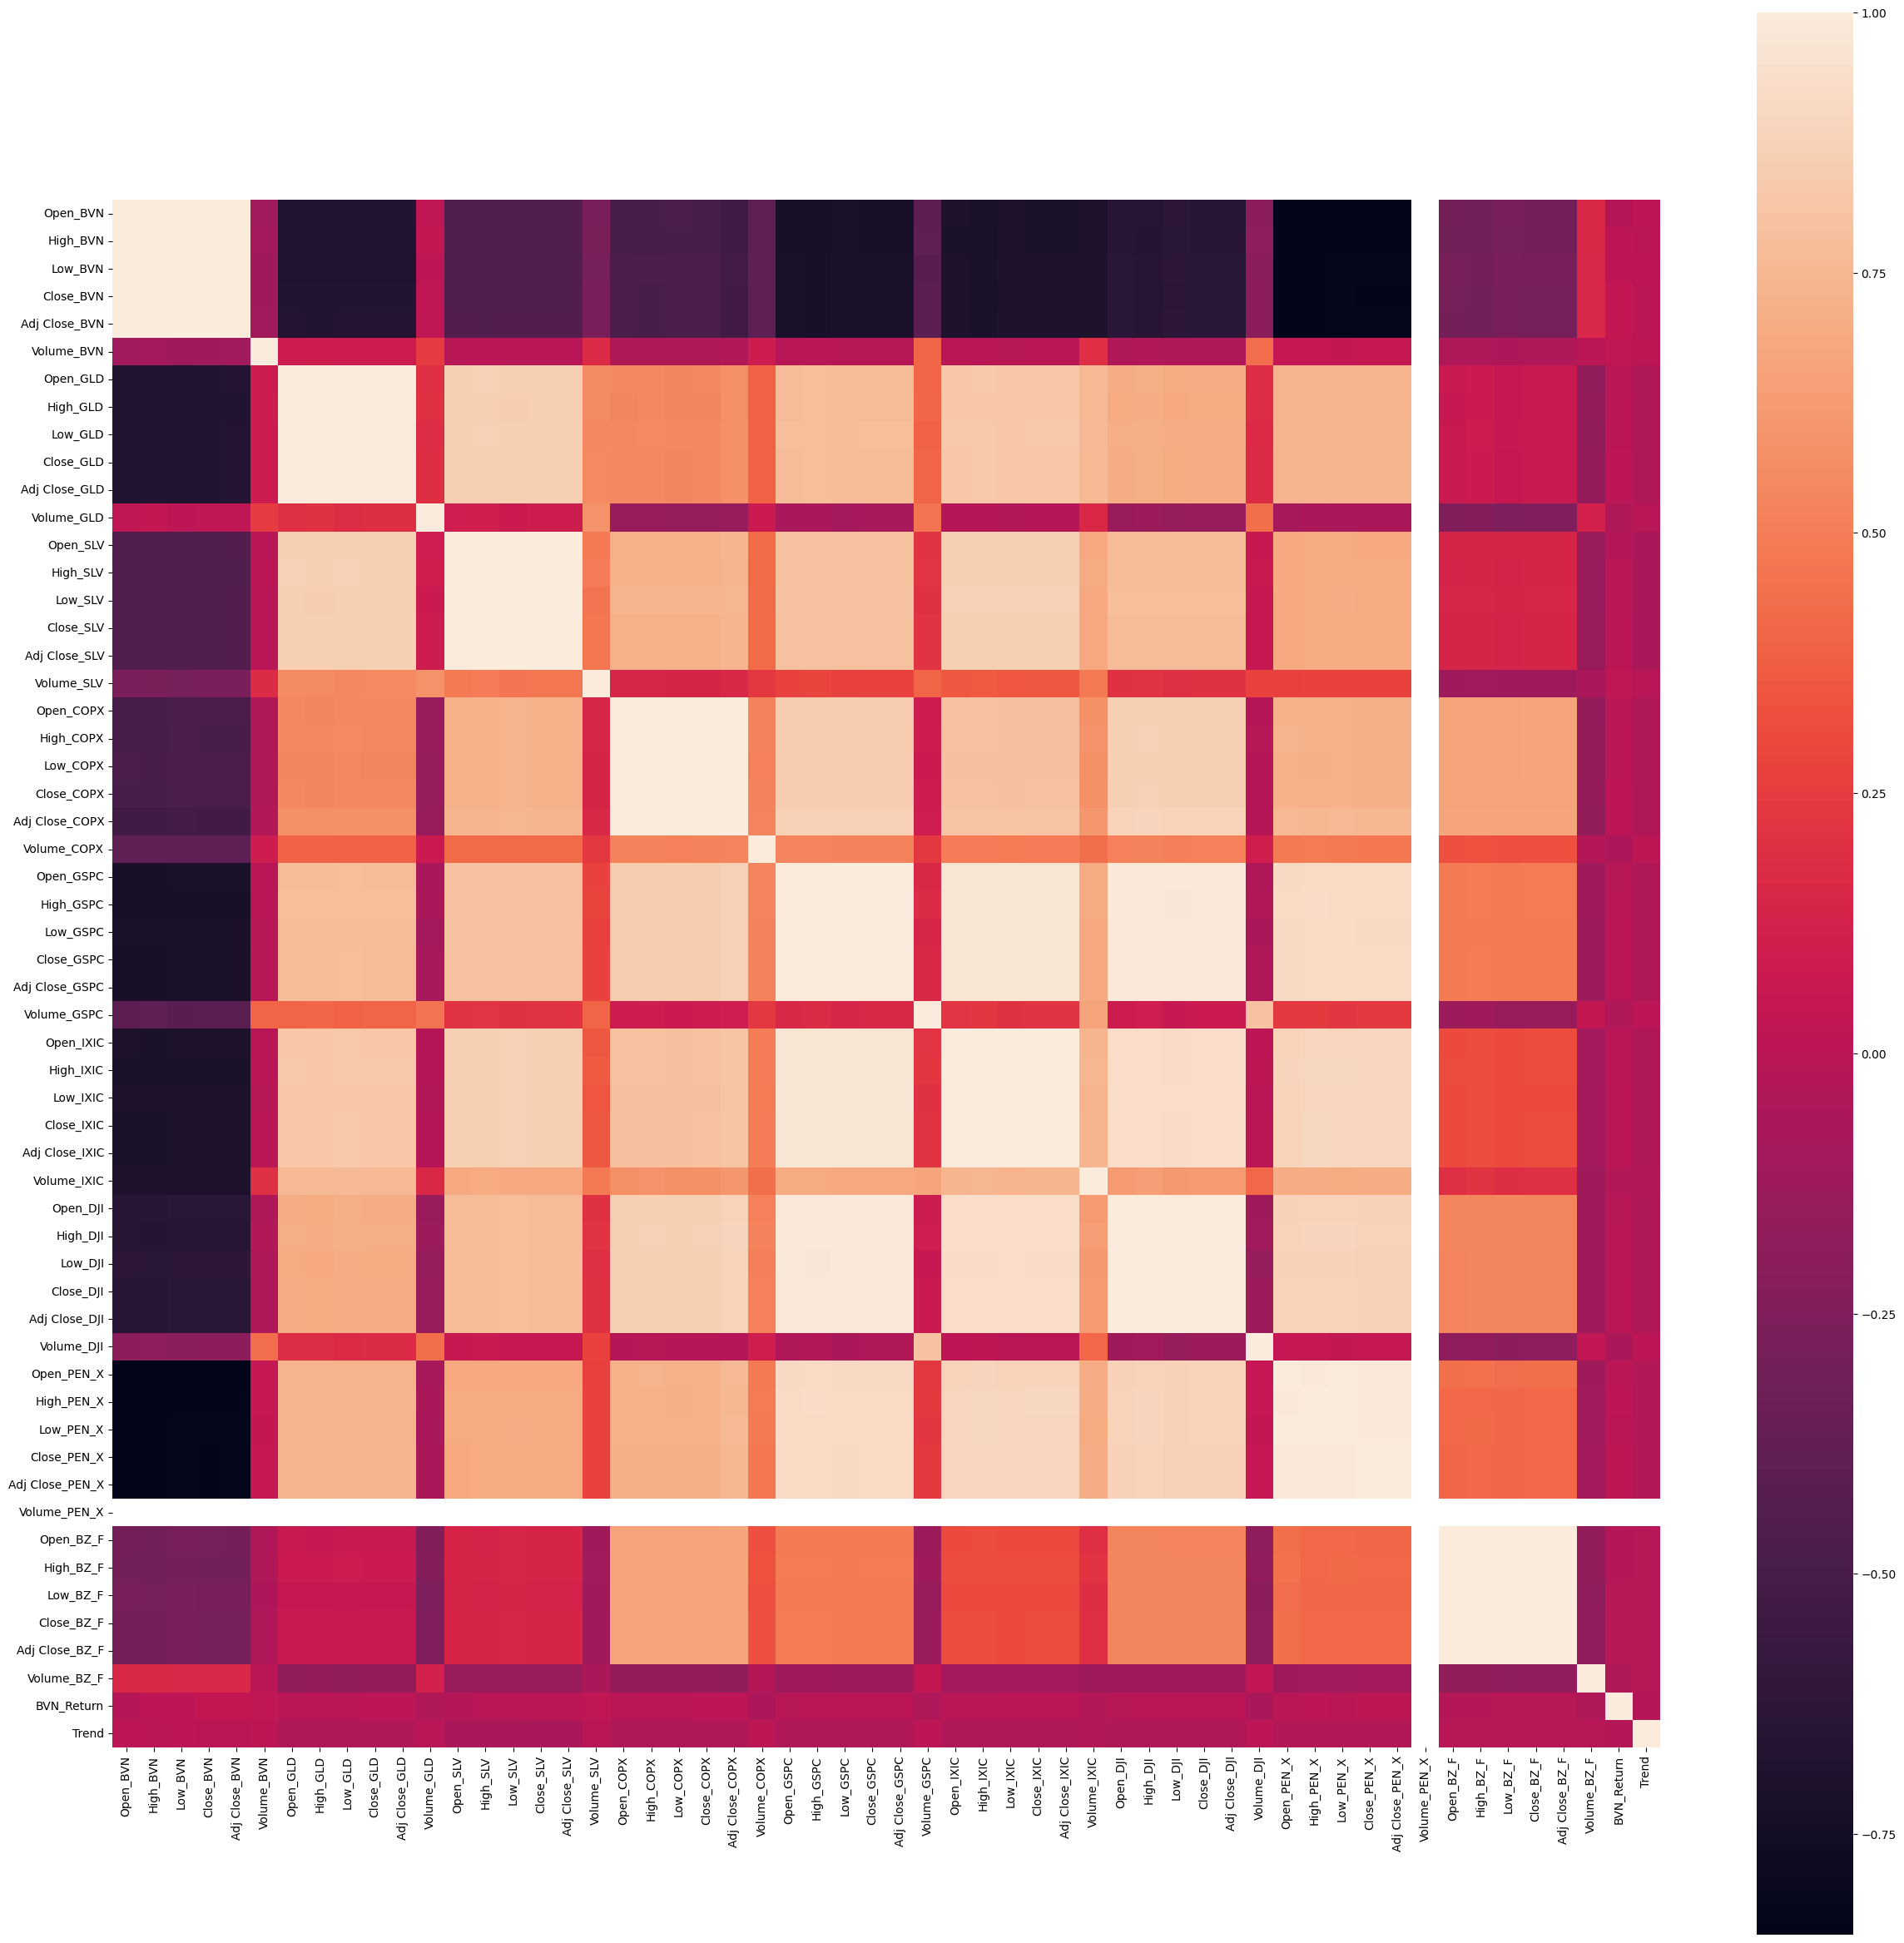

In [18]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corrmat, vmax=1, square=True);

In [67]:
corr = df.corr()
corr[['Trend']].sort_values(by = 'Trend',ascending = False).style.background_gradient()

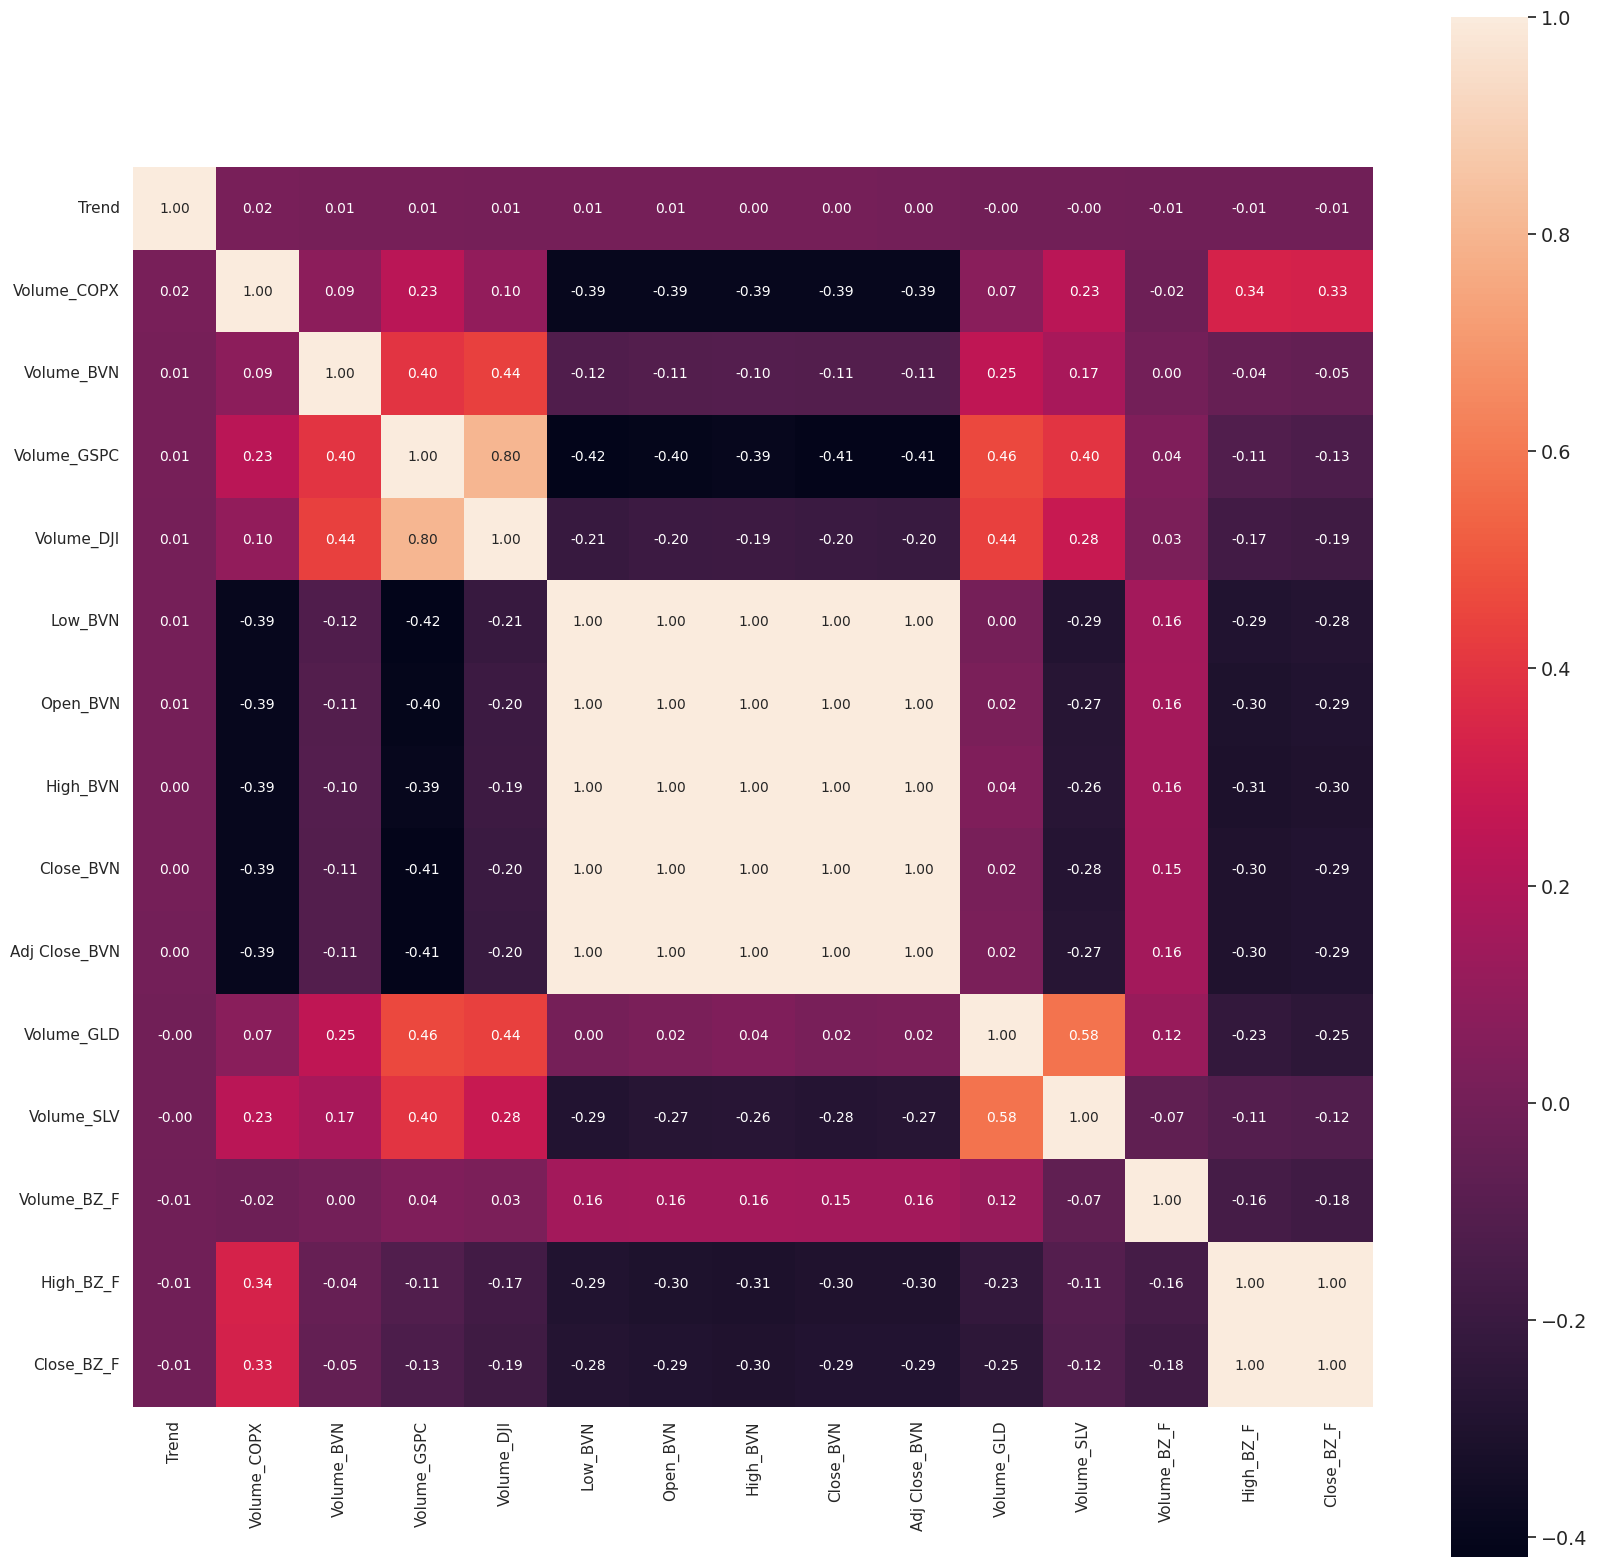

In [68]:
# Matriz de correlación
k = 15 # Número de variables.
cols = corrmat.nlargest(k, 'Trend')['Trend'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(20, 20))
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

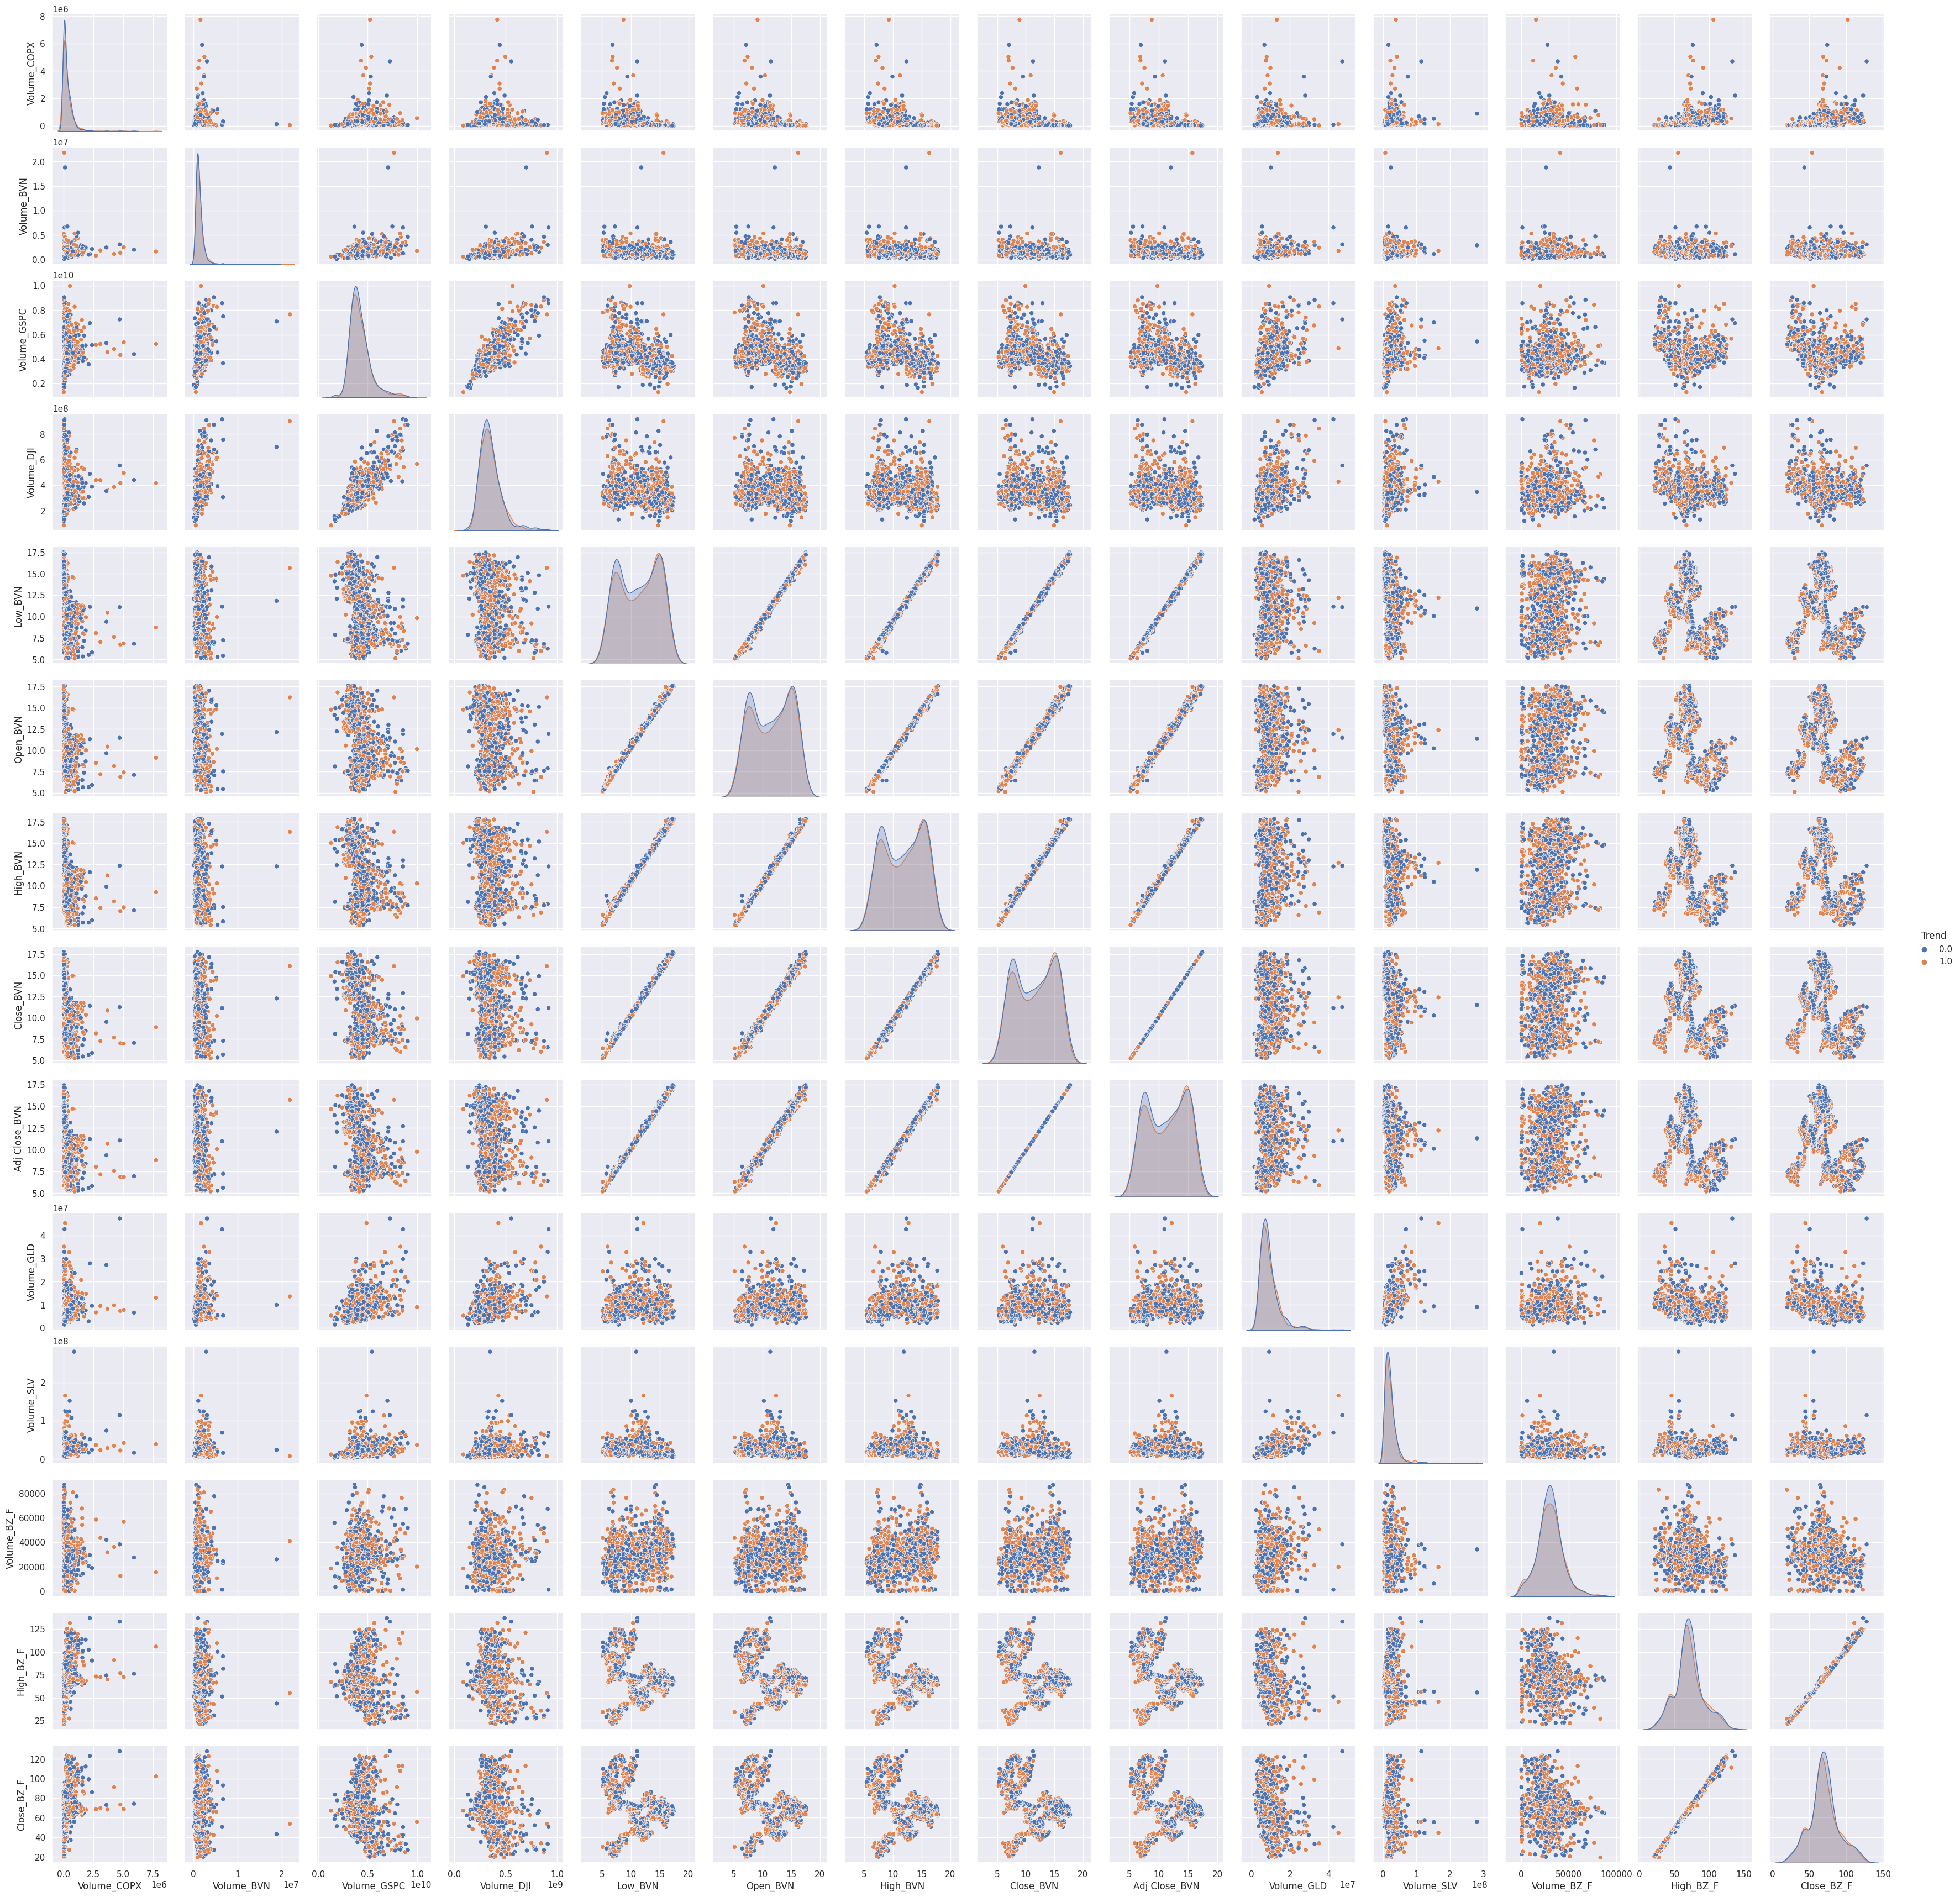

In [69]:
sns.set()
sns.pairplot(df[cols], hue='Trend')
plt.show();

In [19]:
df = df.drop(['Volume_PEN_X'], axis=1)

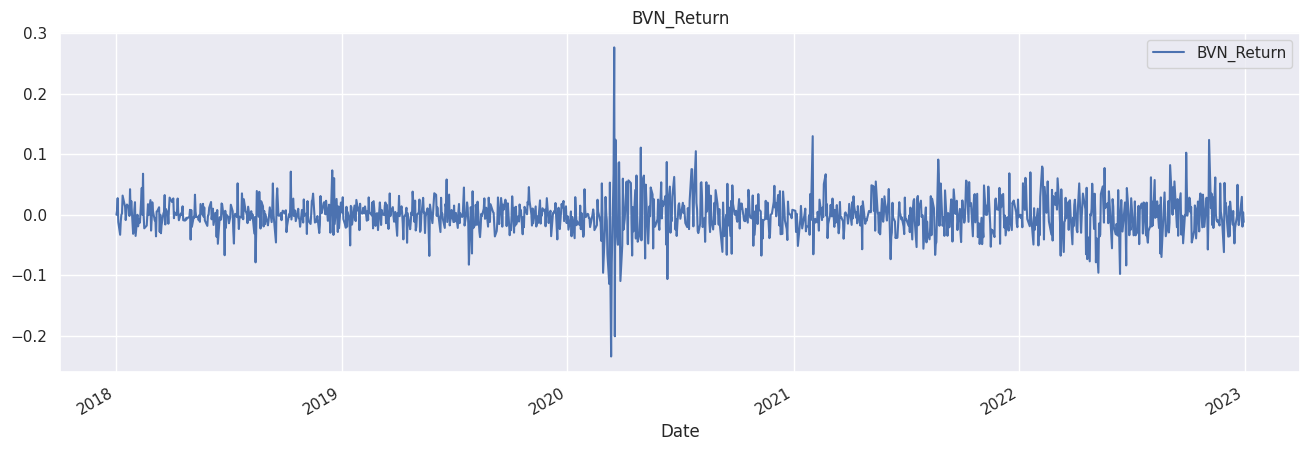

In [71]:
plt.figure(figsize=(16, 5))
plt.title("BVN_Return")
df.BVN_Return.plot()
plt.grid(True);
plt.legend()
plt.show()

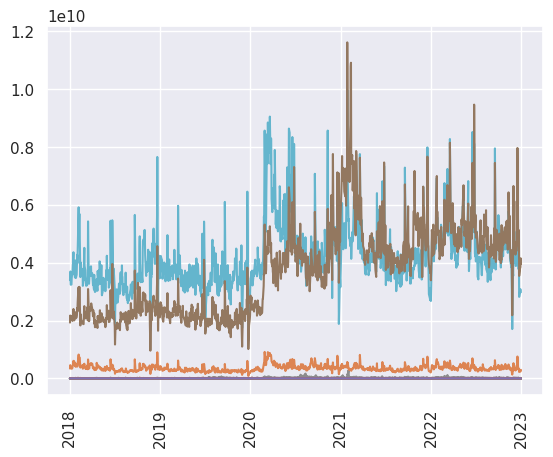

In [72]:
plt.plot(df);
plt.xticks(rotation='vertical');

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
corr = df.corr()
Z = linkage(corr, 'average')
Z[0]

array([ 9., 10.,  0.,  2.])

In [74]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab
c, coph_dists = cophenet(Z, pdist(corr))
c

0.952267580304116

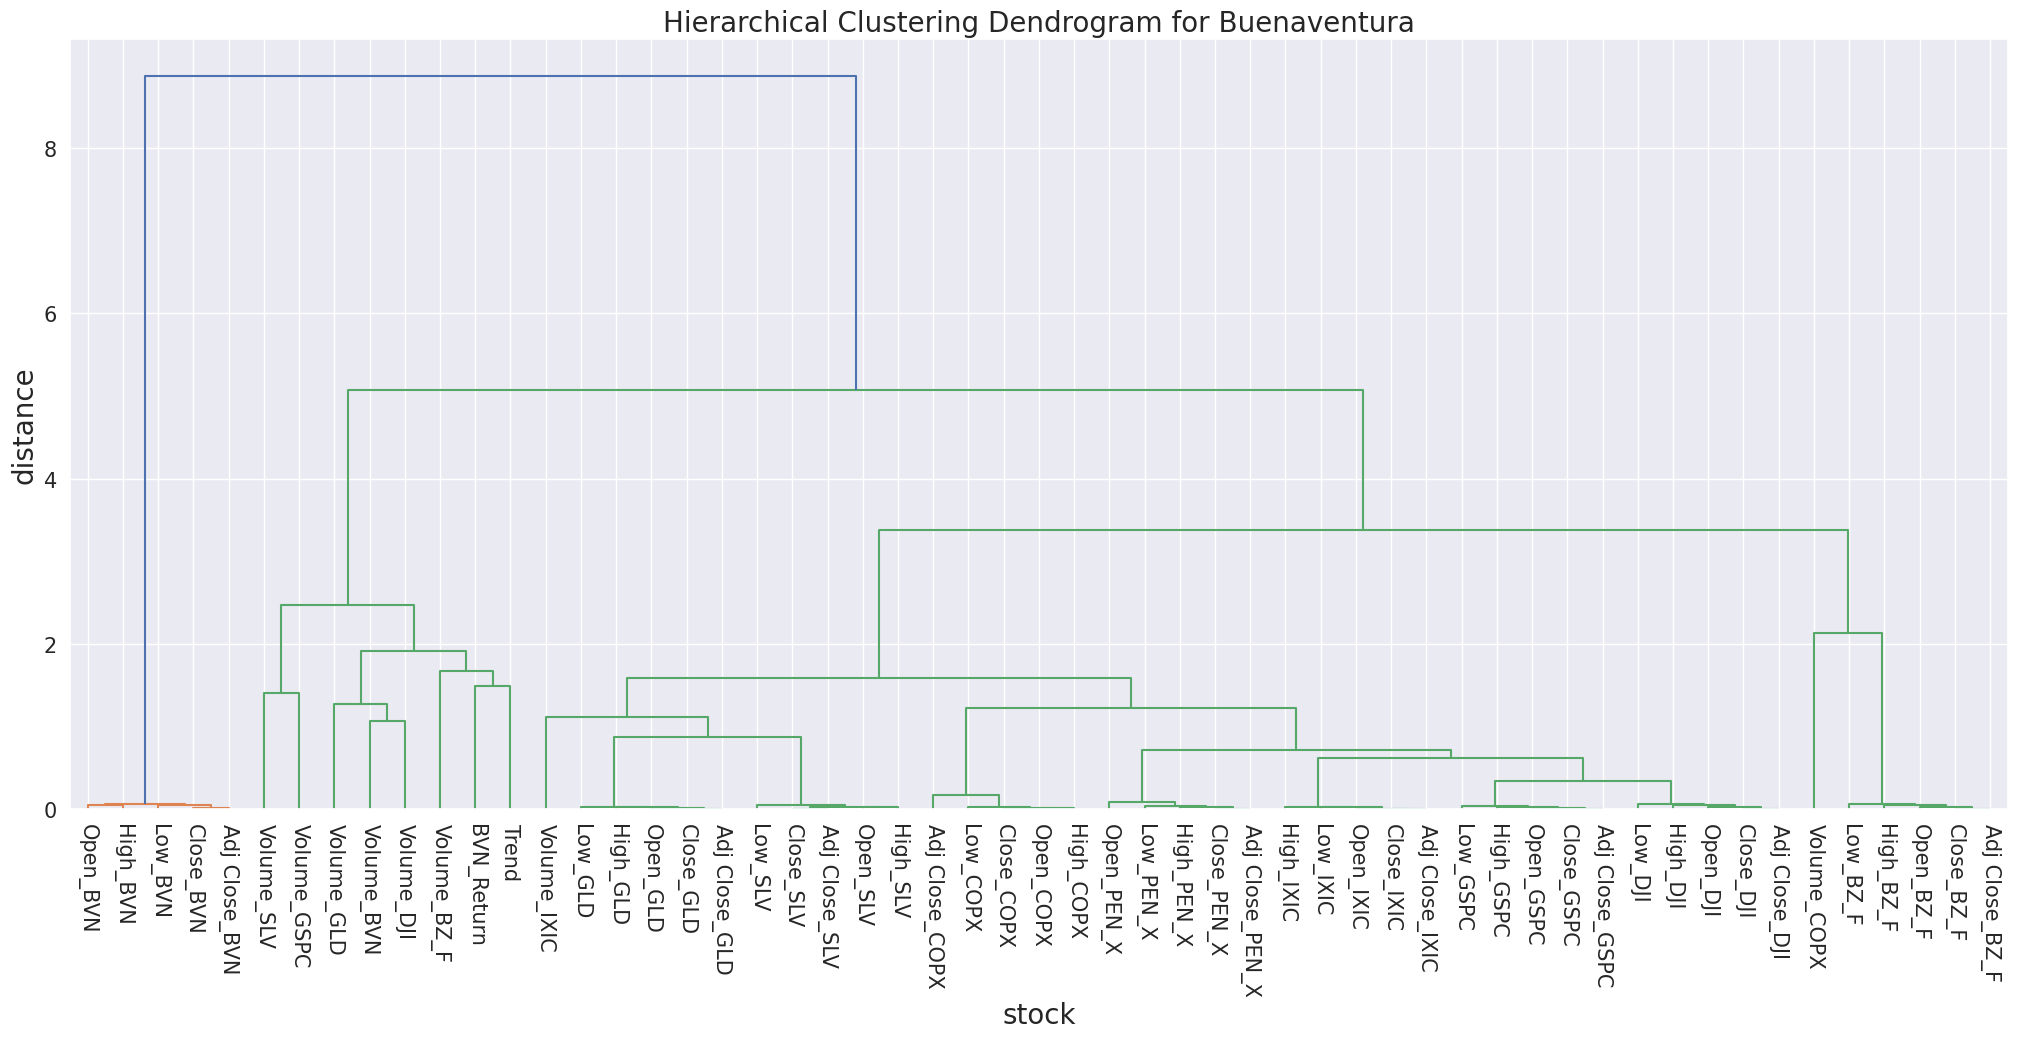

In [75]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram for '+"Buenaventura", fontsize=labelsize)
plt.xlabel('stock', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
plt.savefig('dendogram_'+'Buenaventura'+'.png')
plt.show()

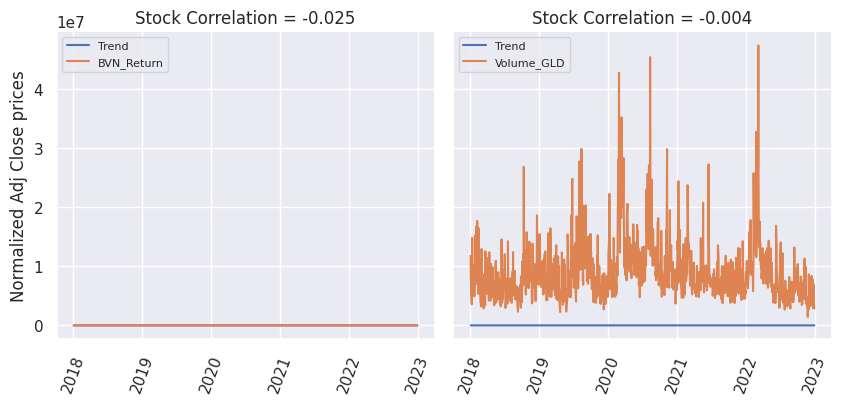

In [76]:
#plot sample correlations
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True)
plt.subplots_adjust(wspace=0.05)

#high correlation
sA = "Trend"
sB = "BVN_Return"
ax1.plot(df[sA],label=sA)
ax1.plot(df[sB],label=sB)
ax1.set_title('Stock Correlation = %.3f'%corr[sA][sB])
ax1.set_ylabel('Normalized Adj Close prices')
ax1.legend(loc='upper left',prop={'size':8})
plt.setp(ax1.get_xticklabels(), rotation=70);

#low correlation
sA = "Trend"
sB = "Volume_GLD"
ax2.plot(df[sA],label=sA)
ax2.plot(df[sB],label=sB)
ax2.set_title('Stock Correlation = %.3f'%corr[sA][sB])
ax2.legend(loc='upper left',prop={'size':8})
plt.setp(ax2.get_xticklabels(), rotation=70);

### Procesamiento - Paso 1



In [20]:
df02 = df.copy()

In [21]:
df02.sample(10)

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-07-05     13.50     13.55    13.29      13.33      12.990291     1156000   
2021-10-05      6.78      6.83     6.54       6.77       6.662141      642800   
2021-03-23     10.77     10.90    10.45      10.45      10.283511      882300   
2019-12-04     15.07     15.26    15.02      15.17      14.928312      660500   
2021-03-01     11.09     11.26    10.93      11.05      10.873953     1608000   
2018-08-29     12.70     12.91    12.60      12.78      12.454306      469000   
2021-11-29      6.86      7.03     6.74       7.00       6.888476     1384500   
2022-12-13      8.00      8.27     7.91       8.02       7.945985      815600   
2022-07-19      6.06      6.15     5.96       6.13       6.073427      915000   
2018-09-06     12.36     12.55    12.15      12.27      11.957303      935600   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  Close_PEN_X  \
Date                                                        ...                
2018-07-05  118.919998  119.330002  118.769997  119.050003  ...     3.289500   
2021-10-05  163.940002  164.850006  163.490005  164.589996  ...     4.130000   
2021-03-23  162.449997  162.490005  161.589996  161.809998  ...     3.723000   
2019-12-04  139.160004  139.169998  138.589996  138.919998  ...     3.388000   
2021-03-01  163.029999  163.350006  161.160004  161.529999  ...     3.581385   
2018-08-29  114.160004  114.209999  113.849998  114.199997  ...     3.291500   
2021-11-29  166.839996  167.259995  166.380005  166.619995  ...     4.011000   
2022-12-13  169.210007  169.789993  168.020004  168.509995  ...     3.768427   
2022-07-19  159.470001  159.869995  159.330002  159.539993  ...     3.825525   
2018-09-06  113.889999  114.260002  113.279999  113.540001  ...     3.314500   

            Adj Close_PEN_X   Open_BZ_F   High_BZ_F    Low_BZ_F  Close_BZ_F  \
Date                                                                          
2018-07-05         3.289500   78.110001   78.489998   77.309998   77.389999   
2021-10-05         4.130000   81.279999   83.110001   81.199997   82.559998   
2021-03-23         3.723000   64.309998   64.339996   60.259998   60.790001   
2019-12-04         3.388000   61.160000   63.529999   60.990002   63.000000   
2021-03-01         3.581385   65.949997   65.949997   65.949997   65.949997   
2018-08-29         3.291500   75.910004   77.419998   75.699997   77.139999   
2021-11-29         4.011000   73.589996   77.000000   72.639999   73.440002   
2022-12-13         3.768427   78.190002   81.279999   78.040001   80.680000   
2022-07-19         3.825525  105.589996  107.599998  103.589996  107.349998   
2018-09-06         3.314500   77.139999   77.750000   75.639999   76.500000   

            Adj Close_BZ_F  Volume_BZ_F  BVN_Return  Trend  
Date                                                        
2018-07-05       77.389999        27678   -0.004481    1.0  
2021-10-05       82.559998        44439   -0.008785    1.0  
2021-03-23       60.790001        43200   -0.039522    0.0  
2019-12-04       63.000000        41730    0.003307    1.0  
2021-03-01       65.949997        33869   -0.000904    1.0  
2018-08-29       77.139999         8895    0.006299    0.0  
2021-11-29       73.440002        12507    0.008646    1.0  
2022-12-13       80.680000        30052    0.006274    0.0  
2022-07-19      107.349998        21900    0.013223    0.0  
2018-09-06       76.500000        31739    0.001633    1.0  

[10 rows x 55 columns]

In [79]:
# Count the number of occurrences of Trend values
trend_counts = df02['Trend'].value_counts()

# Access the count for Trend = 0 and Trend = 1
trend_0_count = trend_counts.get(0, 0)
trend_1_count = trend_counts.get(1, 0)

# Print the counts
print("Count of Trend = 0:", trend_0_count)
print("Count of Trend = 1:", trend_1_count)

Count of Trend = 0: 645
Count of Trend = 1: 609


### Tratamiento de Missing Values

In [22]:
# Store all predictor variables in a variable X
X = df02.drop(['Trend','BVN_Return'], axis=1)
y = df02['Trend']

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

### Particionamiento en Entrenamiento y Test

In [191]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [192]:
df02['Predicted_Signal'] = cls.predict(X)
df02['Predicted_Signal']

Date
2018-01-02    1.0
2018-01-03    1.0
2018-01-04    1.0
2018-01-05    1.0
2018-01-08    1.0
             ... 
2022-12-23    0.0
2022-12-27    0.0
2022-12-28    0.0
2022-12-29    0.0
2022-12-30    0.0
Name: Predicted_Signal, Length: 1254, dtype: float64

In [193]:
df02['Strategy_Return'] = df02.BVN_Return *df02.Predicted_Signal
df02['Strategy_Return']

Date
2018-01-02    0.000000
2018-01-03    0.006887
2018-01-04    0.027360
2018-01-05   -0.011984
2018-01-08   -0.033019
                ...   
2022-12-23   -0.000000
2022-12-27    0.000000
2022-12-28   -0.000000
2022-12-29    0.000000
2022-12-30   -0.000000
Name: Strategy_Return, Length: 1254, dtype: float64

In [194]:
df02['Cum_Ret'] = df02['BVN_Return'].cumsum()
df02

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-02     14.16     14.54    13.99      14.52      14.124080     1643300   
2018-01-03     14.53     14.89    14.35      14.62      14.221352     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610447     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435353     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958714     1286100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...   Low_BZ_F  \
Date                                                        ...              
2018-01-02  124.660004  125.180000  124.389999  125.150002  ...  66.230003   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...  66.400002   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...  67.529999   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...  67.269997   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...  67.449997   
...                ...         ...         ...         ...  ...        ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...  81.339996   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...  83.660004   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...  81.949997   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...  81.300003   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...  82.879997   

            Close_BZ_F  Adj Close_BZ_F  Volume_BZ_F  BVN_Return  Trend  \
Date                                                                     
2018-01-02   66.570000       66.570000        24294    0.000000    1.0   
2018-01-03   67.839996       67.839996        25878    0.006887    1.0   
2018-01-04   68.070000       68.070000        22840    0.027360    0.0   
2018-01-05   67.620003       67.620003        18290   -0.011984    0.0   
2018-01-08   67.779999       67.779999        17704   -0.033019    0.0   
...                ...             ...          ...         ...    ...   
2022-12-23   83.919998       83.919998         8621   -0.009321    1.0   
2022-12-27   84.330002       84.330002         7512    0.029570    0.0   
2022-12-28   83.260002       83.260002         5384   -0.019582    1.0   
2022-12-29   82.260002       82.260002        20599    0.003995    0.0   
2022-12-30   85.910004       85.910004        19375   -0.011936    0.0   

            Predicted_Signal  Strategy_Return   Cum_Ret  Cum_Strategy  
Date                                                                   
2018-01-02               1.0         0.000000  0.000000           0.0  
2018-01-03               1.0         0.006887  0.006887           0.0  
2018-01-04               1.0         0.027360  0.034247           0.0  
2018-01-05               1.0        -0.011984  0.022263           0.0  
2018-01-08               1.0        -0.033019 -0.010756           0.0  
...                      ...              ...       ...           ...  
2022-12-23               0.0        -0.000000 -0.057995           0.0  
2022-12-27               0.0         0.000000 -0.028425           0.0  
2022-12-28               0.0        -0.000000 -0.048007           0.0  
2022-12-29               0.0         0.000000 -0.044013           0.0  
2022-12-30               0.0        -0.000000 -0.055949           0.0  

[1254 rows x 59 columns]

In [195]:
# Plot Strategy Cumulative returns
df02['Cum_Strategy'] = df02['Strategy_Return'].cumsum()
df02

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-02     14.16     14.54    13.99      14.52      14.124080     1643300   
2018-01-03     14.53     14.89    14.35      14.62      14.221352     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610447     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435353     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958714     1286100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...   Low_BZ_F  \
Date                                                        ...              
2018-01-02  124.660004  125.180000  124.389999  125.150002  ...  66.230003   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...  66.400002   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...  67.529999   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...  67.269997   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...  67.449997   
...                ...         ...         ...         ...  ...        ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...  81.339996   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...  83.660004   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...  81.949997   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...  81.300003   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...  82.879997   

            Close_BZ_F  Adj Close_BZ_F  Volume_BZ_F  BVN_Return  Trend  \
Date                                                                     
2018-01-02   66.570000       66.570000        24294    0.000000    1.0   
2018-01-03   67.839996       67.839996        25878    0.006887    1.0   
2018-01-04   68.070000       68.070000        22840    0.027360    0.0   
2018-01-05   67.620003       67.620003        18290   -0.011984    0.0   
2018-01-08   67.779999       67.779999        17704   -0.033019    0.0   
...                ...             ...          ...         ...    ...   
2022-12-23   83.919998       83.919998         8621   -0.009321    1.0   
2022-12-27   84.330002       84.330002         7512    0.029570    0.0   
2022-12-28   83.260002       83.260002         5384   -0.019582    1.0   
2022-12-29   82.260002       82.260002        20599    0.003995    0.0   
2022-12-30   85.910004       85.910004        19375   -0.011936    0.0   

            Predicted_Signal  Strategy_Return   Cum_Ret  Cum_Strategy  
Date                                                                   
2018-01-02               1.0         0.000000  0.000000      0.000000  
2018-01-03               1.0         0.006887  0.006887      0.006887  
2018-01-04               1.0         0.027360  0.034247      0.034247  
2018-01-05               1.0        -0.011984  0.022263      0.022263  
2018-01-08               1.0        -0.033019 -0.010756     -0.010756  
...                      ...              ...       ...           ...  
2022-12-23               0.0        -0.000000 -0.057995     -0.158702  
2022-12-27               0.0         0.000000 -0.028425     -0.158702  
2022-12-28               0.0        -0.000000 -0.048007     -0.158702  
2022-12-29               0.0         0.000000 -0.044013     -0.158702  
2022-12-30               0.0        -0.000000 -0.055949     -0.158702  

[1254 rows x 59 columns]

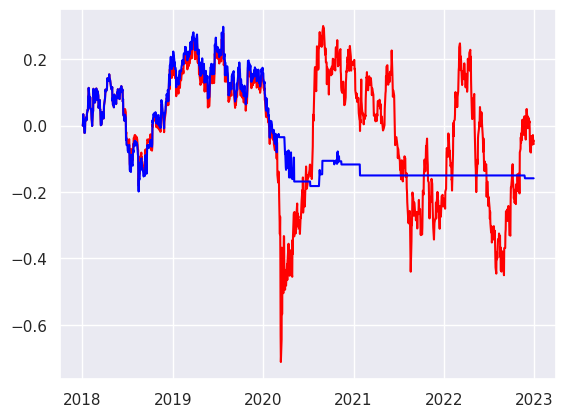

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df02['Cum_Ret'],color='red')
plt.plot(df02['Cum_Strategy'],color='blue')

AQUI SE USA ESCALAMIENTO, ESTE MODELO QUEDA

In [24]:
escala = StandardScaler()

In [23]:
X

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-02     14.16     14.54    13.99      14.52      14.124079     1643300   
2018-01-03     14.53     14.89    14.35      14.62      14.221351     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610445     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435352     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  High_PEN_X  \
Date                                                        ...               
2018-01-02  124.660004  125.180000  124.389999  125.150002  ...    3.237700   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...    3.231300   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...    3.217500   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...    3.211800   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...    3.218600   
...                ...         ...         ...         ...  ...         ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...    3.800000   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...    3.744818   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...    3.748091   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...    3.808000   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...    3.729650   

            Low_PEN_X  Close_PEN_X  Adj Close_PEN_X  Open_BZ_F  High_BZ_F  \
Date                                                                        
2018-01-02   3.164500       3.1650           3.1650  66.419998  67.279999   
2018-01-03   3.171200       3.1719           3.1719  66.489998  68.010002   
2018-01-04   3.166700       3.1655           3.1655  68.000000  68.260002   
2018-01-05   3.148000       3.1503           3.1503  68.059998  68.089996   
2018-01-08   3.146200       3.2090           3.2090  67.820000  67.980003   
...               ...          ...              ...        ...        ...   
2022-12-23   3.729958       3.8000           3.8000  81.730003  84.370003   
2022-12-27   3.717184       3.8175           3.8175  84.459999  85.669998   
2022-12-28   3.740191       3.8080           3.8080  84.599998  84.639999   
2022-12-29   3.737398       3.8080           3.8080  82.860001  82.910004   
2022-12-30   3.712905       3.7850           3.7850  83.660004  86.279999   

             Low_BZ_F  Close_BZ_F  Adj Close_BZ_F  Volume_BZ_F  
Date                                                            
2018-01-02  66.230003   66.570000       66.570000        24294  
2018-01-03  66.400002   67.839996       67.839996        25878  
2018-01-04  67.529999   68.070000       68.070000        22840  
2018-01-05  67.269997   67.620003       67.620003        18290  
2018-01-08  67.449997   67.779999       67.779999        17704  
...               ...         ...             ...          ...  
2022-12-23  81.339996   83.919998       83.919998         8621  
2022-12-27  83.660004   84.330002       84.330002         7512  
2022-12-28  81.949997   83.260002       83.260002         5384  
2022-12-29  81.300003   82.260002       82.260002        20599  
2022-12-30  82.879997   85.910004       85.910004        19375  

[1254 rows x 53 columns]

In [25]:
X = escala.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [27]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [28]:
df02['Predicted_Signal'] = cls.predict(X)
df02['Predicted_Signal']

Date
2018-01-02    0.0
2018-01-03    0.0
2018-01-04    0.0
2018-01-05    0.0
2018-01-08    0.0
             ... 
2022-12-23    0.0
2022-12-27    0.0
2022-12-28    0.0
2022-12-29    0.0
2022-12-30    0.0
Name: Predicted_Signal, Length: 1254, dtype: float64

In [29]:
df02['Strategy_Return'] = df02.BVN_Return *df02.Predicted_Signal
df02['Strategy_Return']

Date
2018-01-02    0.0
2018-01-03    0.0
2018-01-04    0.0
2018-01-05   -0.0
2018-01-08   -0.0
             ... 
2022-12-23   -0.0
2022-12-27    0.0
2022-12-28   -0.0
2022-12-29    0.0
2022-12-30   -0.0
Name: Strategy_Return, Length: 1254, dtype: float64

In [30]:
df02['Cum_Ret'] = df02['BVN_Return'].cumsum()
df02

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-02     14.16     14.54    13.99      14.52      14.124079     1643300   
2018-01-03     14.53     14.89    14.35      14.62      14.221351     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610445     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435352     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  High_BZ_F  \
Date                                                        ...              
2018-01-02  124.660004  125.180000  124.389999  125.150002  ...  67.279999   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...  68.010002   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...  68.260002   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...  68.089996   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...  67.980003   
...                ...         ...         ...         ...  ...        ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...  84.370003   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...  85.669998   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...  84.639999   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...  82.910004   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...  86.279999   

             Low_BZ_F  Close_BZ_F  Adj Close_BZ_F  Volume_BZ_F  BVN_Return  \
Date                                                                         
2018-01-02  66.230003   66.570000       66.570000        24294    0.000000   
2018-01-03  66.400002   67.839996       67.839996        25878    0.006887   
2018-01-04  67.529999   68.070000       68.070000        22840    0.027360   
2018-01-05  67.269997   67.620003       67.620003        18290   -0.011984   
2018-01-08  67.449997   67.779999       67.779999        17704   -0.033019   
...               ...         ...             ...          ...         ...   
2022-12-23  81.339996   83.919998       83.919998         8621   -0.009321   
2022-12-27  83.660004   84.330002       84.330002         7512    0.029570   
2022-12-28  81.949997   83.260002       83.260002         5384   -0.019582   
2022-12-29  81.300003   82.260002       82.260002        20599    0.003995   
2022-12-30  82.879997   85.910004       85.910004        19375   -0.011936   

            Trend  Predicted_Signal  Strategy_Return   Cum_Ret  
Date                                                            
2018-01-02    1.0               0.0              0.0  0.000000  
2018-01-03    1.0               0.0              0.0  0.006887  
2018-01-04    0.0               0.0              0.0  0.034247  
2018-01-05    0.0               0.0             -0.0  0.022263  
2018-01-08    0.0               0.0             -0.0 -0.010756  
...           ...               ...              ...       ...  
2022-12-23    1.0               0.0             -0.0 -0.057995  
2022-12-27    0.0               0.0              0.0 -0.028425  
2022-12-28    1.0               0.0             -0.0 -0.048007  
2022-12-29    0.0               0.0              0.0 -0.044013  
2022-12-30    0.0               0.0             -0.0 -0.055949  

[1254 rows x 58 columns]

In [31]:
# Plot Strategy Cumulative returns
df02['Cum_Strategy'] = df02['Strategy_Return'].cumsum()
df02

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-02     14.16     14.54    13.99      14.52      14.124079     1643300   
2018-01-03     14.53     14.89    14.35      14.62      14.221351     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610445     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435352     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...   Low_BZ_F  \
Date                                                        ...              
2018-01-02  124.660004  125.180000  124.389999  125.150002  ...  66.230003   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...  66.400002   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...  67.529999   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...  67.269997   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...  67.449997   
...                ...         ...         ...         ...  ...        ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...  81.339996   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...  83.660004   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...  81.949997   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...  81.300003   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...  82.879997   

            Close_BZ_F  Adj Close_BZ_F  Volume_BZ_F  BVN_Return  Trend  \
Date                                                                     
2018-01-02   66.570000       66.570000        24294    0.000000    1.0   
2018-01-03   67.839996       67.839996        25878    0.006887    1.0   
2018-01-04   68.070000       68.070000        22840    0.027360    0.0   
2018-01-05   67.620003       67.620003        18290   -0.011984    0.0   
2018-01-08   67.779999       67.779999        17704   -0.033019    0.0   
...                ...             ...          ...         ...    ...   
2022-12-23   83.919998       83.919998         8621   -0.009321    1.0   
2022-12-27   84.330002       84.330002         7512    0.029570    0.0   
2022-12-28   83.260002       83.260002         5384   -0.019582    1.0   
2022-12-29   82.260002       82.260002        20599    0.003995    0.0   
2022-12-30   85.910004       85.910004        19375   -0.011936    0.0   

            Predicted_Signal  Strategy_Return   Cum_Ret  Cum_Strategy  
Date                                                                   
2018-01-02               0.0              0.0  0.000000      0.000000  
2018-01-03               0.0              0.0  0.006887      0.000000  
2018-01-04               0.0              0.0  0.034247      0.000000  
2018-01-05               0.0             -0.0  0.022263      0.000000  
2018-01-08               0.0             -0.0 -0.010756      0.000000  
...                      ...              ...       ...           ...  
2022-12-23               0.0             -0.0 -0.057995      0.358156  
2022-12-27               0.0              0.0 -0.028425      0.358156  
2022-12-28               0.0             -0.0 -0.048007      0.358156  
2022-12-29               0.0              0.0 -0.044013      0.358156  
2022-12-30               0.0             -0.0 -0.055949      0.358156  

[1254 rows x 59 columns]

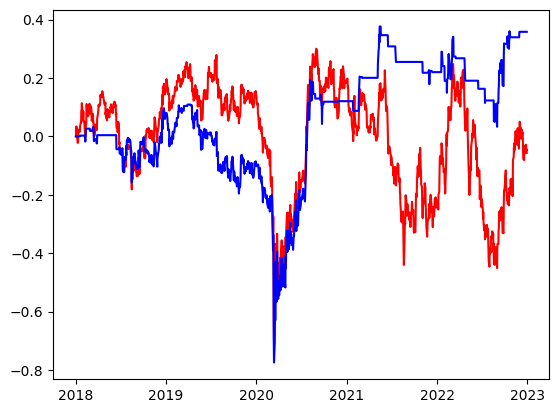

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df02['Cum_Ret'],color='red')
plt.plot(df02['Cum_Strategy'],color='blue')

In [33]:
import joblib
joblib.dump(cls, 'svc_bvn.pkl')

['svc_bvn.pkl']